### <p style="background-color:#d0a1a1;font-family:'Playfair Display', regular;color:#3f475e;font-size:40px;text-align:center;border-radius:3px 3px;">Binary Prediction of Poisonous Mushrooms</p>

### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">1. Imports</p>

In [1]:
!pip install catboost
!pip install shap
!pip install phik

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/98.2 MB ? eta -:--:--

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.1/98.2 MB 1.8 MB/s eta 0:00:56

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.3/98.2 MB 3.3 MB/s eta 0:00:30

     ╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/98.2 MB 10.1 MB/s eta 0:00:10

     ━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/98.2 MB 17.7 MB/s eta 0:00:06

     ━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/98.2 MB 28.3 MB/s eta 0:00:04

     ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/98.2 MB 91.6 MB/s eta 0:00:01

     ━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/98.2 MB 93.0 MB/s eta 0:00:01

     ━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/98.2 MB 91.5 MB/s eta 0:00:01

     ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/98.2 MB 91.9 MB/s eta 0:00:01

     ━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/98.2 MB 66.4 MB/s eta 0:00:02

     ━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/98.2 MB 64.8 MB/s eta 0:00:02

     ━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/98.2 MB 79.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━ 40.5/98.2 MB 87.1 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━ 43.7/98.2 MB 85.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━ 50.1/98.2 MB 88.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━ 53.1/98.2 MB 88.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━ 59.6/98.2 MB 85.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━ 62.8/98.2 MB 87.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━ 69.1/98.2 MB 87.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━ 72.3/98.2 MB 88.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━ 78.6/98.2 MB 89.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━ 81.8/98.2 MB 87.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 88.1/98.2 MB 85.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 88.3/98.2 MB 85.9 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━ 91.3/98.2 MB 74.0 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 97.7/98.2 MB 65.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 98.2/98.2 MB 69.7 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.9 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/17.3 MB ? eta -:--:--

     ━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/17.3 MB 128.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 9.2/17.3 MB 90.4 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━ 10.3/17.3 MB 87.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━ 15.4/17.3 MB 67.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 17.3/17.3 MB 64.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 17.3/17.3 MB 64.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 17.3/17.3 MB 64.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 17.3/17.3 MB 64.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 17.3/17.3 MB 64.2 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 23.8 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 3.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/540.1 kB ? eta -:--:--

     ━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/540.1 kB 1.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 225.3/540.1 kB 2.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━ 512.0/540.1 kB 3.8 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 532.5/540.1 kB 3.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╺ 532.5/540.1 kB 3.6 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 1.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/686.1 kB ? eta -:--:--

     ━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/686.1 kB 1.5 MB/s eta 0:00:01

     ━━━━━━━━━━━━╸━━━━━━━━━━━━━━━━━━━━━━━━━━ 225.3/686.1 kB 2.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 460.8/686.1 kB 3.3 MB/s eta 0:00:01

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 3.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
import seaborn as sns
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    classification_report,
    confusion_matrix,
    f1_score,
)

shap.initjs()

/usr/local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
mushroom_palette = [
    "#e0b89c",  # warm beige (like a porcini mushroom)
    "#b9c2b8",  # soft sage green (resembling a lichen-covered mushroom)
    "#f4e3d7",  # light beige (like the cap of a common mushroom)
    "#d8b4a0",  # light brown (similar to a shiitake mushroom)
    "#a88c6f",  # mushroom brown (like a button mushroom)
    "#8c5c3c",  # earthy brown (resembling a chanterelle)
    "#6f4f28",  # dark brown (like a morel mushroom)
    "#c4b5a4",  # soft taupe (similar to a maitake)
    "#b29a82",  # sandy beige (resembling an enoki mushroom)
    "#f2e2d2",  # creamy white (like a white truffle)
    "#8a7d68",  # olive brown (like a king oyster mushroom)
    "#a5a58d",  # muted green (resembling a moss-covered mushroom)
    "#e5d6c6",  # pale mushroom cap (like a honey mushroom)
    "#9e8c5a",  # brownish tan (similar to a reishi mushroom)
    "#6f6f4f",  # deep grayish brown (like a turkey tail mushroom)
    "#d8c9b6",  # soft mushroom pink (resembling a pink oyster mushroom)
    "#8c7c6d",  # medium mushroom brown (like a birch bolete)
    "#f4eae0",  # very light beige (similar to a ghost mushroom)
    "#d3b7a0",  # light orange-brown (like a honeycomb mushroom)
    "#9a8c6f",  # muted brown (similar to a black trumpet mushroom)
    "#b9c2b8",  # soft sage green (resembling a lichen-covered mushroom)
    "#d0a1a1",  # muted coral (similar to some earth-toned mushrooms)
    "#c5a69c",  # dusty rose (like a faded mushroom cap)
    "#b5b6a7",  # muted olive (resembling a weathered mushroom)
    "#b1a6a4",  # soft brown-gray (like a faded mushroom cap)
]

In [4]:
from matplotlib.colors import LinearSegmentedColormap

colors = ["#f4e3d7", "#9e8c5a"]

cmap = LinearSegmentedColormap.from_list("earthy_gradient", colors, N=30)
sns.set_theme(style="whitegrid", palette=mushroom_palette)

### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">2. EDA</p>

In [5]:
train = pd.read_csv("/kaggle/input/playground-series-s4e8/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s4e8/test.csv")

In [6]:
len(train)

3116945

In [7]:
len(test)

2077964

In [8]:
train.head()

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


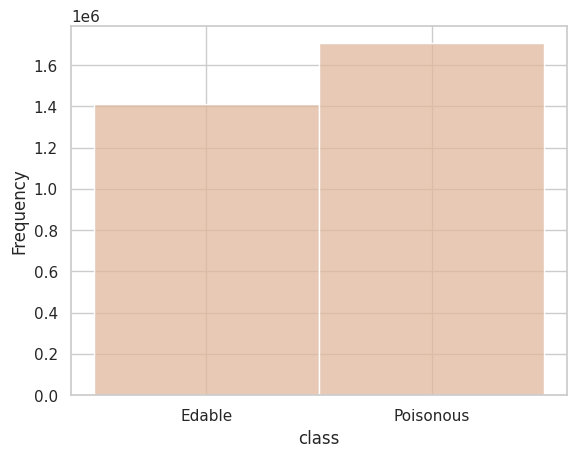

In [9]:
sns.histplot(train["class"], discrete=True, bins=2, kde=False)
plt.ylabel("Frequency")
plt.xticks(["e", "p"], ["Edable", "Poisonous"])
plt.show()

Classes are more or less balanced - that's great!

In [10]:
train.isna().mean()

id                      0.000000
class                   0.000000
cap-diameter            0.000001
cap-shape               0.000013
cap-surface             0.215282
cap-color               0.000004
does-bruise-or-bleed    0.000003
gill-attachment         0.168093
gill-spacing            0.403740
gill-color              0.000018
stem-height             0.000000
stem-width              0.000000
stem-root               0.884527
stem-surface            0.635514
stem-color              0.000012
veil-type               0.948843
veil-color              0.879370
has-ring                0.000008
ring-type               0.041348
spore-print-color       0.914255
habitat                 0.000014
season                  0.000000
dtype: float64

In [11]:
test.isna().mean()

id                      0.000000e+00
cap-diameter            3.368682e-06
cap-shape               1.491845e-05
cap-surface             2.150682e-01
cap-color               6.256124e-06
does-bruise-or-bleed    4.812403e-06
gill-attachment         1.683480e-01
gill-spacing            4.040469e-01
gill-color              2.358077e-05
stem-height             4.812403e-07
stem-width              0.000000e+00
stem-root               8.845254e-01
stem-surface            6.359533e-01
stem-color              1.010605e-05
veil-type               9.487869e-01
veil-color              8.788044e-01
has-ring                9.143566e-06
ring-type               4.148051e-02
spore-print-color       9.141722e-01
habitat                 1.203101e-05
season                  0.000000e+00
dtype: float64

In [12]:
train.describe()

,id,cap-diameter,stem-height,stem-width
count,3.116945e+06,3.116941e+06,3.116945e+06,3.116945e+06
mean,1.558472e+06,6.309848e+00,6.348333e+00,1.115379e+01
std,8.997847e+05,4.657931e+00,2.699755e+00,8.095477e+00
min,0.000000e+00,3.000000e-02,0.000000e+00,0.000000e+00
25%,7.792360e+05,3.320000e+00,4.670000e+00,4.970000e+00
50%,1.558472e+06,5.750000e+00,5.880000e+00,9.650000e+00
75%,2.337708e+06,8.240000e+00,7.410000e+00,1.563000e+01
max,3.116944e+06,8.067000e+01,8.872000e+01,1.029000e+02


In [13]:
train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

Let's have a look at the data more precisely


![](https://www.shutterstock.com/image-vector/mushroom-structure-anatomy-biology-diagram-600nw-2258337629.jpg)

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">1. cap-diameter</p>

In [14]:
train["cap-diameter"].describe()

count    3.116941e+06
mean     6.309848e+00
std      4.657931e+00
min      3.000000e-02
25%      3.320000e+00
50%      5.750000e+00
75%      8.240000e+00
max      8.067000e+01
Name: cap-diameter, dtype: float64

In [15]:
train["cap-diameter"].isna().sum()

4

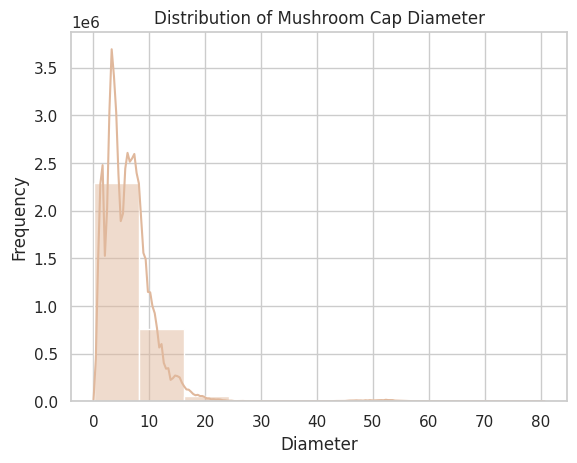

In [16]:
sns.histplot(train["cap-diameter"], bins=10, kde=True)
plt.title("Distribution of Mushroom Cap Diameter")
plt.xlabel("Diameter")
plt.ylabel("Frequency")
plt.show()

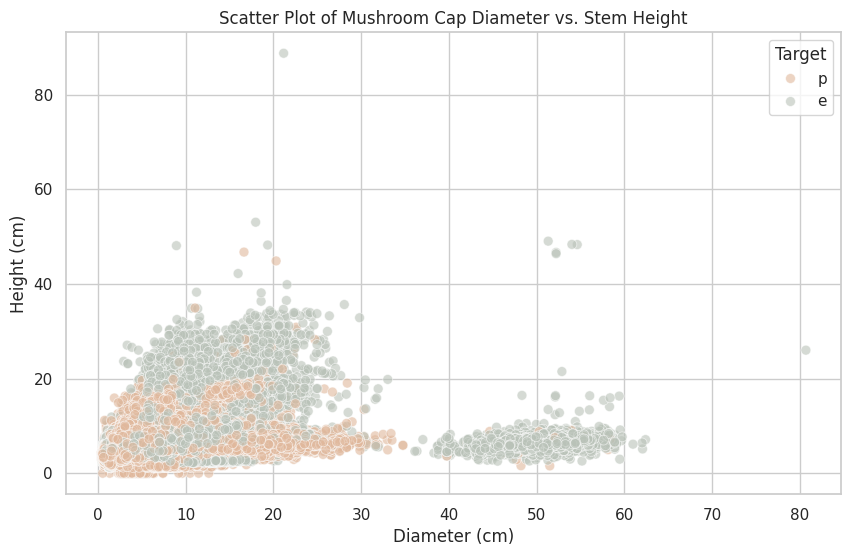

In [17]:
sampled_data = train.sample(frac=0.5)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="cap-diameter", y="stem-height", hue="class", data=sampled_data, alpha=0.6, s=50
)
plt.title("Scatter Plot of Mushroom Cap Diameter vs. Stem Height")
plt.xlabel("Diameter (cm)")
plt.ylabel("Height (cm)")
plt.legend(title="Target")
plt.show()

Remove nan from train and fill the test with median 

In [18]:
train = train.dropna(subset=["cap-diameter"])
test["cap-diameter"] = test["cap-diameter"].fillna(test["cap-diameter"].median())

In [19]:
train["cap-diameter"].isna().sum()

0

In [20]:
test["cap-diameter"].isna().sum()

0

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">2. cap-shape</p>

In [21]:
train["cap-shape"].describe()

count     3116901
unique         74
top             x
freq      1436024
Name: cap-shape, dtype: object

In [22]:
test["cap-shape"].describe()

count     2077933
unique         62
top             x
freq       957949
Name: cap-shape, dtype: object

In [23]:
shapes_train = dict(train["cap-shape"].value_counts())

In [24]:
shapes_train

{'x': 1436024,
 'f': 676237,
 's': 365145,
 'b': 318646,
 'o': 108835,
 'p': 106967,
 'c': 104520,
 'd': 65,
 'e': 60,
 'n': 41,
 'w': 36,
 't': 36,
 'g': 34,
 'y': 33,
 'r': 32,
 'a': 30,
 'u': 27,
 'z': 22,
 'l': 21,
 'i': 14,
 'k': 13,
 'h': 6,
 '7 x': 2,
 '3.55': 2,
 'm': 2,
 '4.97': 2,
 '8': 2,
 '6.44': 1,
 '8.3': 1,
 '7.6': 1,
 '17.44': 1,
 '4.33': 1,
 '2.82': 1,
 '3.91': 1,
 '6.21': 1,
 '8.29': 1,
 '54.78': 1,
 '20.25': 1,
 '3.52': 1,
 '3.04': 1,
 'ring-type': 1,
 '10.13': 1,
 'is p': 1,
 '7.43': 1,
 '0.82': 1,
 '10.46': 1,
 '2.77': 1,
 '2.94': 1,
 '12.62': 1,
 '5.15': 1,
 '19.04': 1,
 '49.21': 1,
 'b f': 1,
 '9.13': 1,
 '1.66': 1,
 '3.37': 1,
 '7.21': 1,
 '3.25': 1,
 '11.12': 1,
 '3 x': 1,
 'is s': 1,
 '4.22': 1,
 '3.6': 1,
 '21.56': 1,
 '6 x': 1,
 '24.16': 1,
 '2.85': 1,
 '6.53': 1,
 '19.29': 1,
 '5 f': 1,
 '4.3': 1,
 '7.41': 1,
 '2.63': 1,
 '19.06': 1}

In [25]:
shapes_test = dict(test["cap-shape"].value_counts())

In [26]:
shapes_test

{'x': 957949,
 'f': 452360,
 's': 242698,
 'b': 211879,
 'o': 71972,
 'p': 71302,
 'c': 69436,
 'e': 33,
 'd': 30,
 't': 28,
 'w': 27,
 'n': 27,
 'a': 24,
 'y': 24,
 'u': 18,
 'k': 17,
 'g': 17,
 'l': 17,
 'r': 16,
 'z': 8,
 'i': 4,
 'm': 4,
 'h': 3,
 'is f': 2,
 '7.21': 1,
 '3.34': 1,
 '19.76': 1,
 '0.93': 1,
 '8.3': 1,
 '3.32': 1,
 'p f': 1,
 '5 f': 1,
 '1.25': 1,
 '4.55': 1,
 'ring-type': 1,
 '11.43': 1,
 '6': 1,
 '5.59': 1,
 '4.41': 1,
 '3.73': 1,
 '3.47': 1,
 '6.75': 1,
 '51.63': 1,
 '6.52': 1,
 '9.49': 1,
 '2.7': 1,
 '3.15': 1,
 '5.05': 1,
 'cap-diameter': 1,
 '4.51': 1,
 '4.86': 1,
 '0.97': 1,
 '3.94': 1,
 '6.47': 1,
 '3.23': 1,
 '2.02': 1,
 '1.53': 1,
 '8': 1,
 '6.15': 1,
 '17.89': 1,
 '0.74': 1,
 '4.54': 1}

I decided to create a new category for strange shapes - no-data

In [27]:
def classify_cap_shape(value):
    if isinstance(value, str) and value.isalpha() and len(value) == 1:
        return value
    else:
        return "no_info"


train.loc[:, "cap-shape"] = train["cap-shape"].apply(classify_cap_shape)
test.loc[:, "cap-shape"] = test["cap-shape"].apply(classify_cap_shape)

In [28]:
train["cap-shape"].value_counts()

cap-shape
x          1436024
f           676237
s           365145
b           318646
o           108835
p           106967
c           104520
no_info         95
d               65
e               60
n               41
w               36
t               36
g               34
y               33
r               32
a               30
u               27
z               22
l               21
i               14
k               13
h                6
m                2
Name: count, dtype: int64

In [29]:
test["cap-shape"].value_counts()

cap-shape
x          957949
f          452360
s          242698
b          211879
o           71972
p           71302
c           69436
no_info        71
e              33
d              30
t              28
n              27
w              27
a              24
y              24
u              18
g              17
k              17
l              17
r              16
z               8
i               4
m               4
h               3
Name: count, dtype: int64

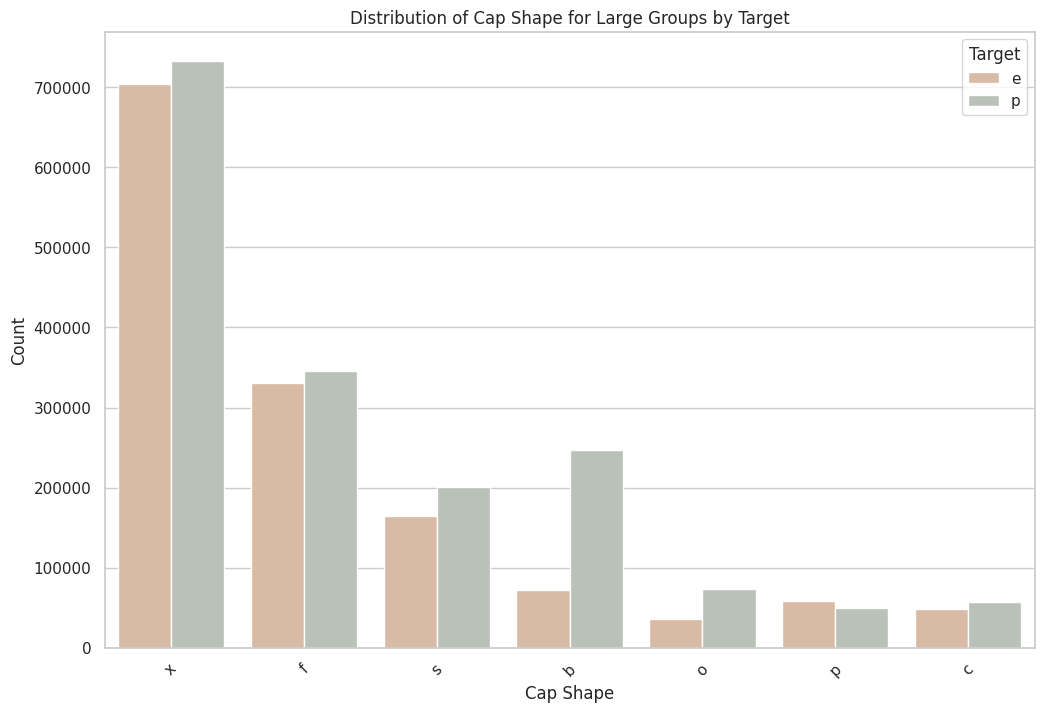

In [30]:
large_groups = train[train["cap-shape"].isin(["x", "f", "s", "b", "o", "p", "c"])]

plt.figure(figsize=(12, 8))
sns.countplot(
    data=large_groups,
    x="cap-shape",
    hue="class",
    order=large_groups["cap-shape"].value_counts().index,
)
plt.title("Distribution of Cap Shape for Large Groups by Target")
plt.xlabel("Cap Shape")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Target")
plt.show()

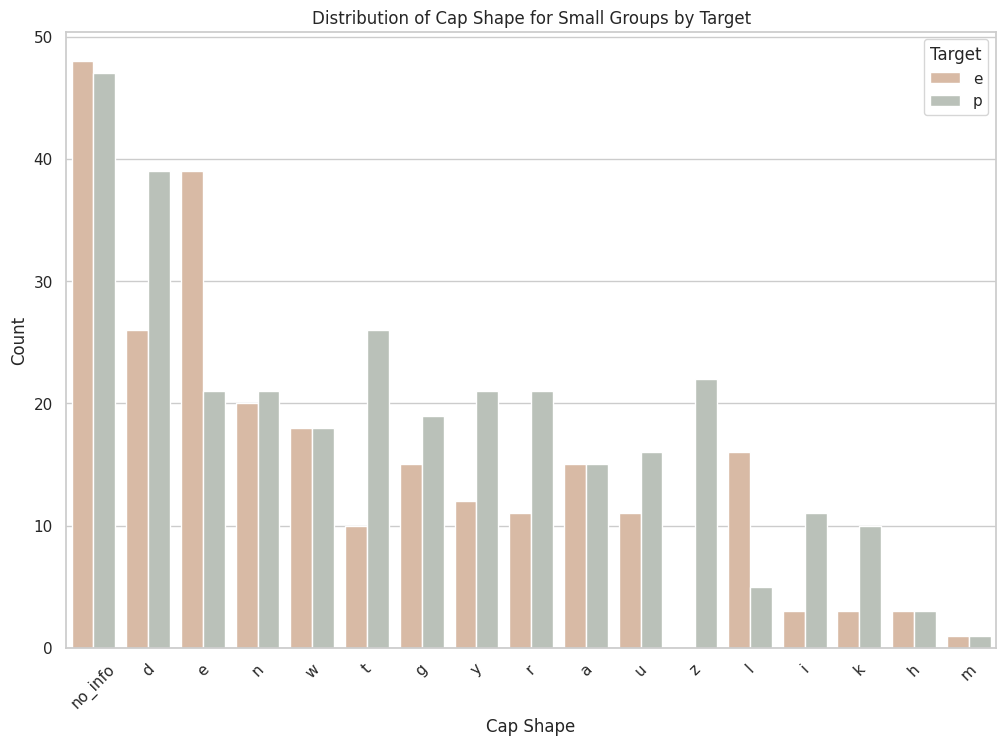

In [31]:
# Фильтрация данных для малочисленных групп
small_groups = train[
    train["cap-shape"].isin(
        [
            "no_info",
            "e",
            "d",
            "t",
            "n",
            "w",
            "a",
            "y",
            "u",
            "g",
            "k",
            "l",
            "r",
            "z",
            "i",
            "m",
            "h",
        ]
    )
]

plt.figure(figsize=(12, 8))
sns.countplot(
    data=small_groups,
    x="cap-shape",
    hue="class",
    order=small_groups["cap-shape"].value_counts().index,
)
plt.title("Distribution of Cap Shape for Small Groups by Target")
plt.xlabel("Cap Shape")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Target")
plt.show()

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">3. cap-surface</p>

In [32]:
surfaces = dict(train["cap-surface"].value_counts())

In [33]:
surfaces

{'t': 460777,
 's': 384970,
 'y': 327826,
 'h': 284460,
 'g': 263729,
 'd': 206831,
 'k': 128875,
 'e': 119712,
 'i': 113440,
 'w': 109840,
 'l': 44859,
 'n': 96,
 'f': 75,
 'p': 59,
 'u': 49,
 'a': 44,
 'm': 42,
 'o': 39,
 'r': 35,
 'x': 33,
 'c': 31,
 'b': 18,
 'z': 8,
 'season': 7,
 'ring-type': 4,
 'class': 2,
 'does None': 2,
 'has-ring': 2,
 'does t': 2,
 'is None': 1,
 '5.73': 1,
 '14.04': 1,
 '1.42': 1,
 '8.96': 1,
 '10.83': 1,
 'has h': 1,
 '24.38': 1,
 '2.81': 1,
 '0.88': 1,
 '2.11': 1,
 '2.79': 1,
 'does-bruise-or-bleed': 1,
 '4.93': 1,
 '1.08': 1,
 'is k': 1,
 '10.34': 1,
 'spore-print-color': 1,
 'spore-color': 1,
 '2.92': 1,
 '41.91': 1,
 '12.2': 1,
 'does h': 1,
 '8.01': 1,
 '0.87': 1,
 '9.22': 1,
 '1.14': 1,
 '6.49': 1,
 '10.1': 1,
 '2.51': 1,
 '7.99': 1,
 'is y': 1,
 '3.64': 1,
 '3.33': 1,
 '15.94': 1,
 '2.7': 1,
 'does l': 1,
 '4.21': 1,
 'cap-diameter': 1,
 '1.43': 1,
 '7.14': 1,
 'is h': 1,
 '0.85': 1,
 '6.57': 1,
 '12.79': 1,
 '6.45': 1,
 '4.66': 1,
 '23.18': 1,
 '

In [34]:
unique_values = train["cap-surface"].unique()
print(unique_values)

['s' 'h' 'y' 'l' 't' 'e' 'g' nan 'd' 'i' 'w' 'k' '15.94' 'f' 'n' 'r' 'o'
 'a' 'u' 'z' '2.7' 'does l' '5.07' 'p' 'b' 'm' 'cap-diameter' '1.43' 'x'
 '7.14' 'c' 'is h' 'does t' '0.85' '6.57' '12.79' '6.45' '4.66' '23.18'
 '3.06' '16.39' '4.21' 'veil-color' '11.78' '8.1' 'has-ring' 'does h'
 '1.42' 'class' 'has h' 'does None' '10.83' 'season' '8.96' '14.04' '5.73'
 'is None' '24.38' '2.81' '0.88' '2.11' '2.79' 'ring-type'
 'does-bruise-or-bleed' '4.93' 'spore-print-color' 'spore-color' '2.92'
 '2.51' '7.99' 'is y' '3.64' '3.33' '41.91' '12.2' '8.01' '9.22' '1.14'
 '6.49' '10.34' '10.1' '1.08' 'is k' '0.87']


In [35]:
train["cap-surface"].isna().mean()

0.2152815853748916

In [36]:
train.loc[:, "cap-surface"] = train["cap-surface"].apply(classify_cap_shape)
test.loc[:, "cap-surface"] = test["cap-surface"].apply(classify_cap_shape)

In [37]:
train["cap-surface"].value_counts()

cap-surface
no_info    671093
t          460777
s          384970
y          327826
h          284460
g          263729
d          206831
k          128875
e          119712
i          113440
w          109840
l           44859
n              96
f              75
p              59
u              49
a              44
m              42
o              39
r              35
x              33
c              31
b              18
z               8
Name: count, dtype: int64

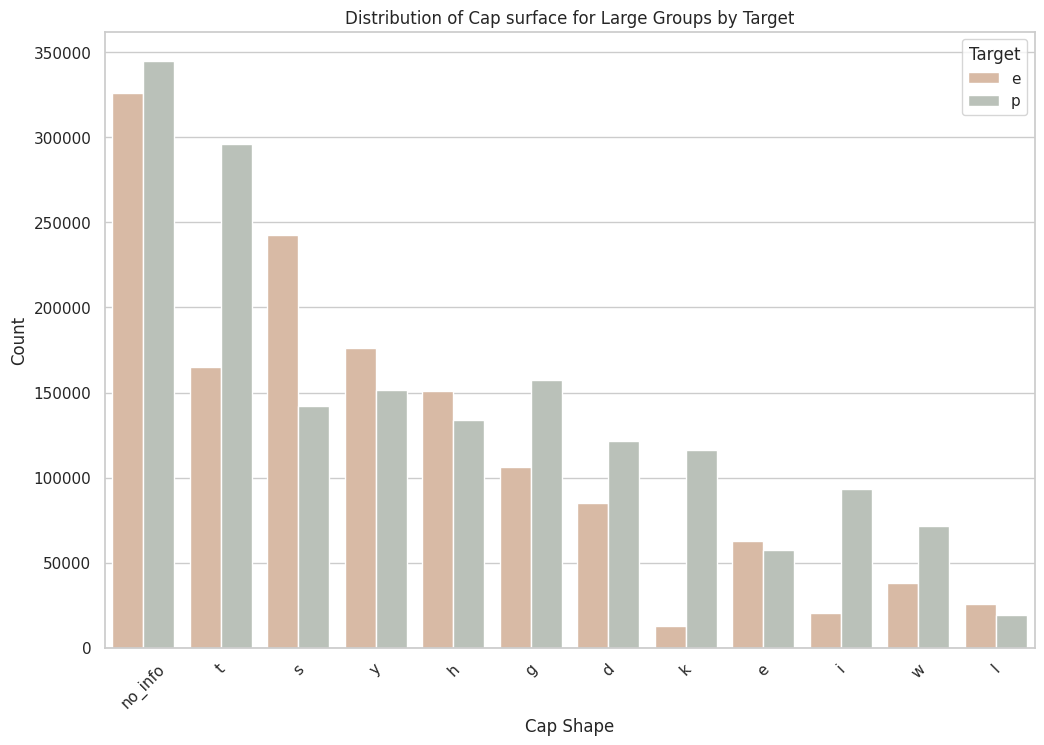

In [38]:
large_groups = train[
    train["cap-surface"].isin(
        ["no_info", "t", "s", "y", "h", "g", "d", "k", "e", "i", "w", "l"]
    )
]

plt.figure(figsize=(12, 8))
sns.countplot(
    data=large_groups,
    x="cap-surface",
    hue="class",
    order=large_groups["cap-surface"].value_counts().index,
)
plt.title("Distribution of Cap surface for Large Groups by Target")
plt.xlabel("Cap Shape")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Target")
plt.show()

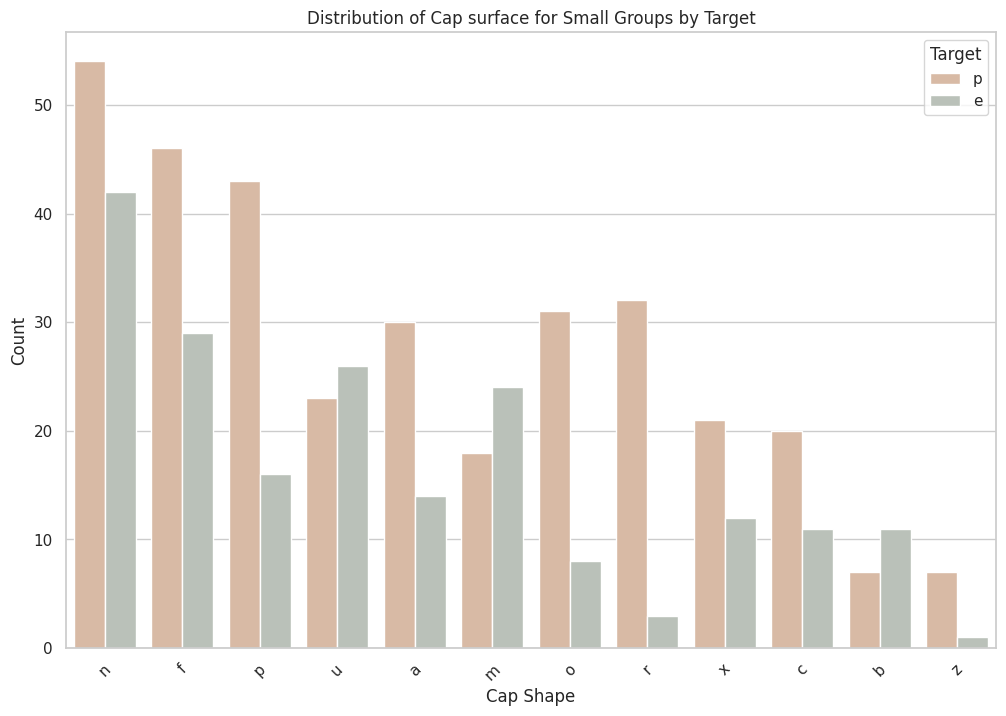

In [39]:
["n", "f", "p", "u", "a", "m", "o", "r", "x", "c", "b", "z"]

small_groups = train[
    train["cap-surface"].isin(
        ["n", "f", "p", "u", "a", "m", "o", "r", "x", "c", "b", "z"]
    )
]

plt.figure(figsize=(12, 8))
sns.countplot(
    data=small_groups,
    x="cap-surface",
    hue="class",
    order=small_groups["cap-surface"].value_counts().index,
)
plt.title("Distribution of Cap surface for Small Groups by Target")
plt.xlabel("Cap Shape")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Target")
plt.show()

In [40]:
train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">4. cap-color</p>

In [41]:
train["cap-color"].unique()

array(['u', 'o', 'b', 'g', 'w', 'n', 'e', 'y', 'r', 'p', 'k', 'l', 'i',
       'h', 'd', 's', 'a', 'f', '2.05', 'season', 'c', 'x', '13', '7.72',
       'm', 'z', '6.76', '7.15', 't', 'ring-type', nan, 'class', '12.89',
       '8.83', '24.75', '22.38', '1.51', '10.1', '17.94', '3.57',
       'does n', '4.89', '6.2', '21.53', '6.41', '4.98', '3.95',
       'does-bruise-or-bleed', '6.59', '5.25', 'veil-color', '6.9',
       '5.41', '11.13', '3.11', '2.57', '17.93', '2.7', '8.57', '11.92',
       '3.08', '2.82', '4.24', '17.19', '3.34', '7', '2.9', '6.36',
       '5.91', '10.56', '26.89', '4. n', '20.62', 'stem-surface', '20.02',
       '20', '25.98', '8.67', '9.02'], dtype=object)

In [42]:
train.loc[:, "cap-color"] = train["cap-color"].apply(classify_cap_shape)
test.loc[:, "cap-color"] = test["cap-color"].apply(classify_cap_shape)

In [43]:
train["cap-color"].value_counts()

cap-color
n          1359540
y           386626
w           379441
g           210825
e           197290
o           178847
p            91838
r            78236
u            73172
b            61313
k            59888
l            39558
no_info         84
f               53
d               48
s               39
a               30
t               26
h               22
c               14
m               14
x               14
i               13
z               10
Name: count, dtype: int64

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">4. does-bruise-or-bleed</p>

In [44]:
train["does-bruise-or-bleed"].unique()

array(['f', 't', 'd', 'has-ring', 'w', 'o', 'b', 'x', 'p', nan, 'g', 'y',
       'r', 'a', 'l', 'i', 'c', 'n', 'z', 's', 'k', 'h', '3.43', 'e',
       '4.42', '2.9', 'u'], dtype=object)

In [45]:
train.loc[:, "does-bruise-or-bleed"] = train["does-bruise-or-bleed"].apply(
    classify_cap_shape
)
test.loc[:, "does-bruise-or-bleed"] = test["does-bruise-or-bleed"].apply(
    classify_cap_shape
)

In [46]:
train["does-bruise-or-bleed"].value_counts()

does-bruise-or-bleed
f          2569742
t           547082
w               14
no_info         12
c               11
h                9
b                7
a                7
y                7
x                7
k                6
s                6
d                4
e                4
p                4
l                4
o                3
g                3
z                3
n                2
i                2
r                1
u                1
Name: count, dtype: int64

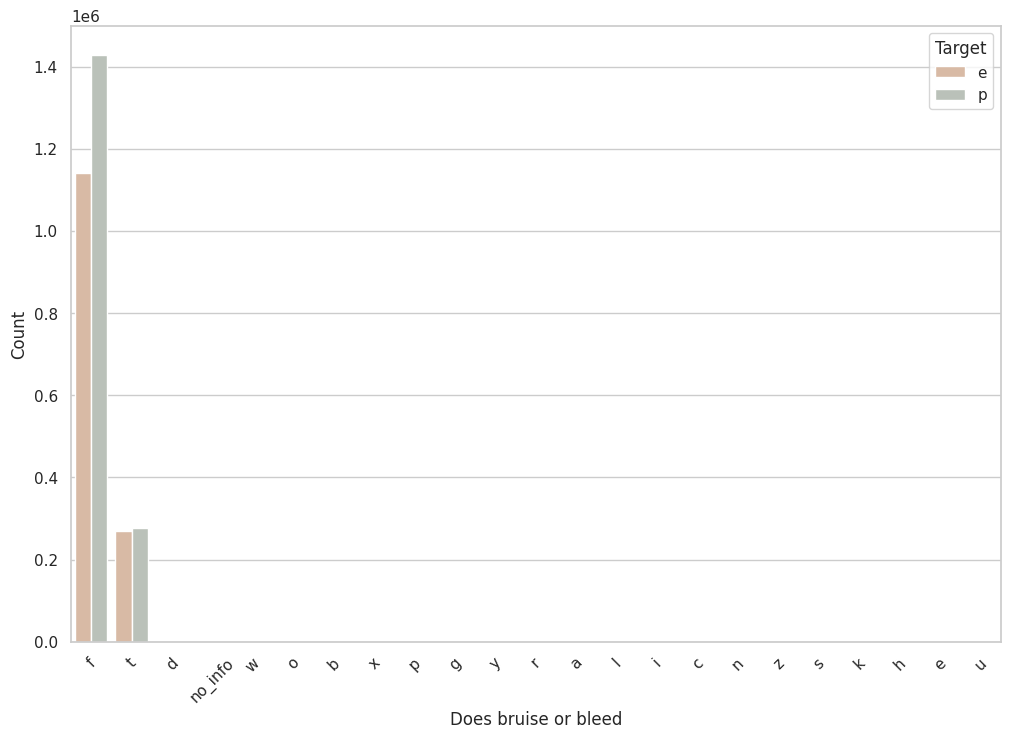

In [47]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train, x="does-bruise-or-bleed", hue="class")
plt.xlabel("Does bruise or bleed")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Target")
plt.show()

I guess this column should be binary, let's make three classes f, t and no-data

In [48]:
def classify_bruise_or_bleed(value):
    if value in ("f", "t"):
        return value
    else:
        return "no_info"


train.loc[:, "does-bruise-or-bleed"] = train["does-bruise-or-bleed"].apply(
    classify_bruise_or_bleed
)
test.loc[:, "does-bruise-or-bleed"] = test["does-bruise-or-bleed"].apply(
    classify_bruise_or_bleed
)

In [49]:
train["does-bruise-or-bleed"].value_counts()

does-bruise-or-bleed
f          2569742
t           547082
no_info        117
Name: count, dtype: int64

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">5. gill - attachment</p>

In [50]:
train["gill-attachment"].unique()

array(['a', 'x', 's', 'd', 'e', nan, 'f', 'p', 'l', 'm', 'b', '32.54',
       'n', 'g', 'i', 'u', 'does-bruise-or-bleed', 't', 'o', 'c', 'w',
       '4.64', 'k', 'r', '4.77', 'h', 'p p', '7.92', 'z', 'season', 'y',
       '8.79', 'does None', 'has f', 'ring-type', '16.33', '10.85',
       '20.07', '2.82', '7.86', '3.91', 'does', '10.23', '6.74', '0.92',
       '3.45', '1', 'is a', '3.71', '50.44', '11.62', 'has d', '1.32',
       '8.47', '6.11', '2.41', '2.54', '6.32', '19.65', '15.49', '4.01',
       '8.37', 'does f', '28.7', '13.15', '1.37', '28.15', '7.09', '9.88',
       '2.67', '18.21', '1.48', '5.93', '1.51', '16.27', '11.26', '2.79',
       'is f', '13.94'], dtype=object)

In [51]:
train.loc[:, "gill-attachment"] = train["gill-attachment"].apply(classify_cap_shape)
test.loc[:, "gill-attachment"] = test["gill-attachment"].apply(classify_cap_shape)

In [52]:
train["gill-attachment"].value_counts()

gill-attachment
a          646033
d          589235
no_info    523996
x          360877
e          301858
s          295439
p          279109
f          119953
c              74
u              56
w              37
t              36
k              33
y              28
i              25
m              22
g              22
b              21
n              20
o              18
h              18
l              16
r              10
z               5
Name: count, dtype: int64

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">6. gill-spacing</p>

In [53]:
train["gill-spacing"].value_counts()

gill-spacing
c              1331052
d               407932
f               119380
e                   24
a                   17
s                   16
b                   12
x                    8
t                    8
p                    7
g                    4
k                    4
h                    3
l                    3
y                    2
r                    2
6.67                 2
0                    2
9.01                 1
2.69                 1
3.61                 1
class                1
4.8                  1
4.04                 1
3.57                 1
i                    1
w                    1
24.38                1
cap-surface          1
0.73                 1
5.22                 1
3.92                 1
5.42                 1
12.27                1
1                    1
1.6                  1
n                    1
3.81                 1
4.09                 1
1.36                 1
3.24                 1
5.55                 1
5.7                  

In [54]:
valid_values = ["a", "b", "c", "d", "e", "f", "g", "h"]

train["gill-spacing"] = train["gill-spacing"].apply(
    lambda x: x if x in valid_values else "no_info"
)
test["gill-spacing"] = test["gill-spacing"].apply(
    lambda x: x if x in valid_values else "no_info"
)

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">7. gill-color</p>

In [55]:
train["gill-color"].unique()

array(['w', 'n', 'g', 'k', 'y', 'f', 'p', 'o', 'b', 'u', 'e', 'r', 'd',
       't', '3.45', 'z', '5', '3.39', 'season', 'h', 'x', 's', '4',
       'class', 'c', 'm', 'spacing', '0.92', nan, '18.12', 'l', 'does w',
       'a', '7.59', '8.06', '6.19', 'has-ring', '4.49', '9.46', '5.01',
       'ring-type', '3.4', 'i', '17', '10.07', 'stem-root', '20.6',
       'spore-print-color', '18.03', 'does-bruise-or-bleed', '8.83',
       'habitat', '10.21', '4.64', '6.4', 'is y', 'e y', '1.91', 'does n',
       '16.41', '6.41', 'veil-type', '20.44', '8.37'], dtype=object)

In [56]:
train.loc[:, "gill-color"] = train["gill-color"].apply(classify_cap_shape)
test.loc[:, "gill-color"] = test["gill-color"].apply(classify_cap_shape)

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">8. stem-height</p>

In [57]:
train["stem-height"].isna().sum()

0

In [58]:
test["stem-height"].isna().sum()

1

In [59]:
test["stem-height"] = test["stem-height"].fillna(train["stem-height"].median())

In [60]:
test["stem-height"].isna().sum()

0

In [61]:
train["stem-height"].describe()

count    3.116941e+06
mean     6.348333e+00
std      2.699756e+00
min      0.000000e+00
25%      4.670000e+00
50%      5.880000e+00
75%      7.410000e+00
max      8.872000e+01
Name: stem-height, dtype: float64

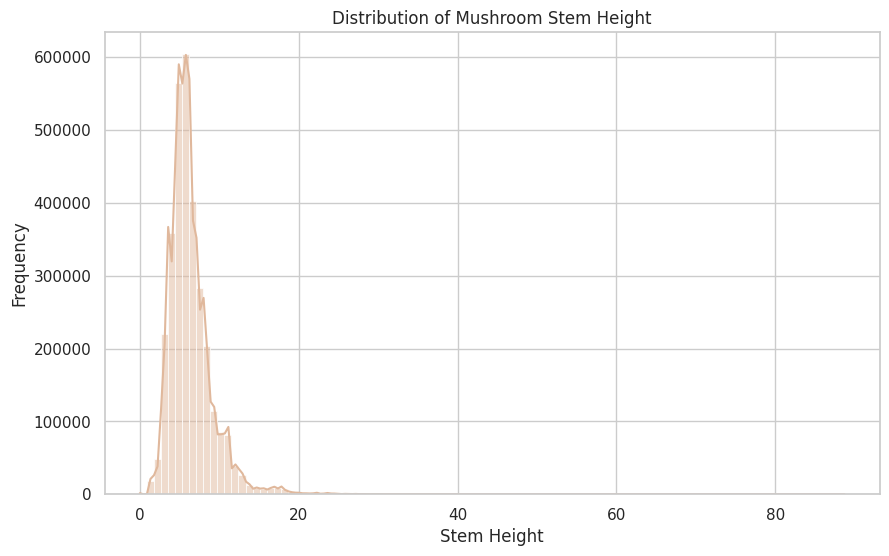

In [62]:
plt.figure(figsize=(10, 6))
sns.histplot(train["stem-height"], kde=True, bins=100)
plt.title("Distribution of Mushroom Stem Height")
plt.xlabel("Stem Height")
plt.ylabel("Frequency")
plt.show()

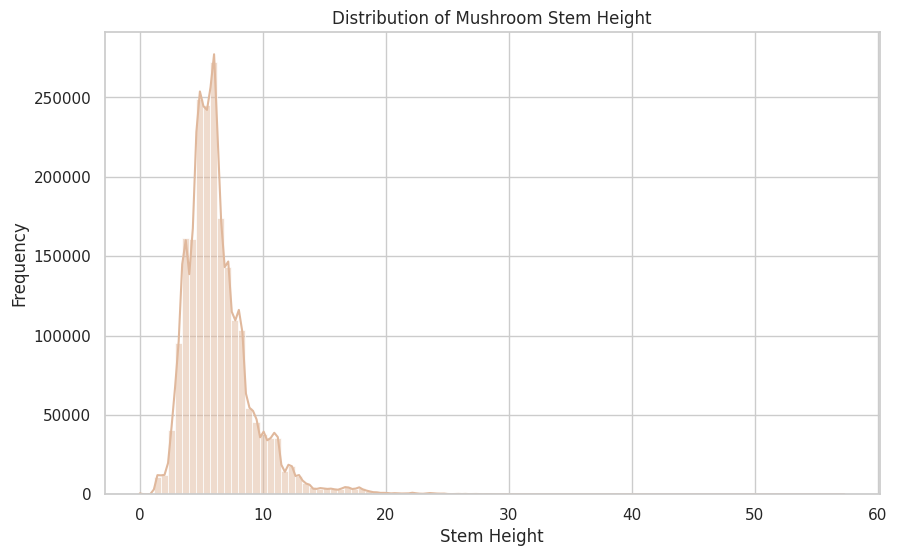

In [63]:
plt.figure(figsize=(10, 6))
sns.histplot(test["stem-height"], kde=True, bins=100)
plt.title("Distribution of Mushroom Stem Height")
plt.xlabel("Stem Height")
plt.ylabel("Frequency")
plt.show()

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">9. stem-width</p>

In [64]:
train["stem-width"].isna().sum()

0

In [65]:
test["stem-width"].isna().sum()

0

In [66]:
train["stem-width"]

0          15.39
1           6.48
2           9.93
3           6.53
4           8.36
           ...  
3116940    18.81
3116941    26.97
3116942    11.06
3116943    17.77
3116944     7.79
Name: stem-width, Length: 3116941, dtype: float64

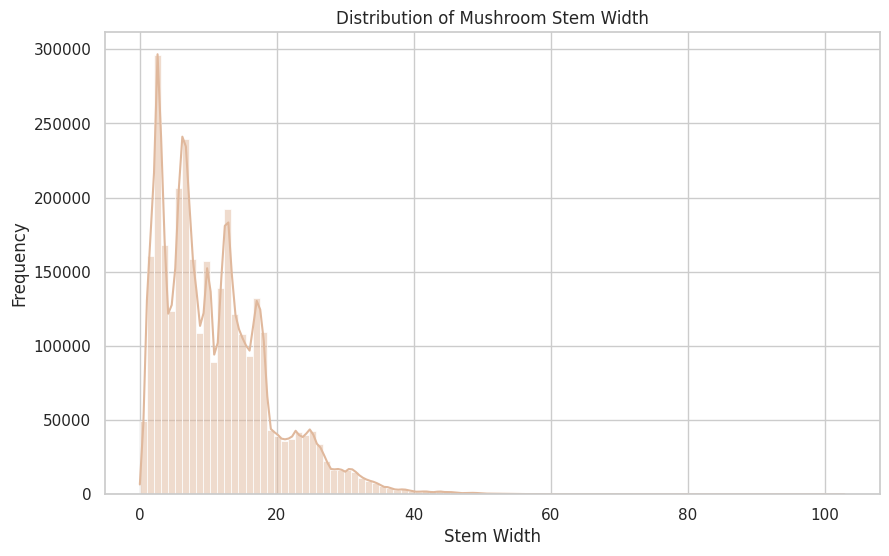

In [67]:
plt.figure(figsize=(10, 6))
sns.histplot(train["stem-width"], kde=True, bins=100)
plt.title("Distribution of Mushroom Stem Width")
plt.xlabel("Stem Width")
plt.ylabel("Frequency")
plt.show()

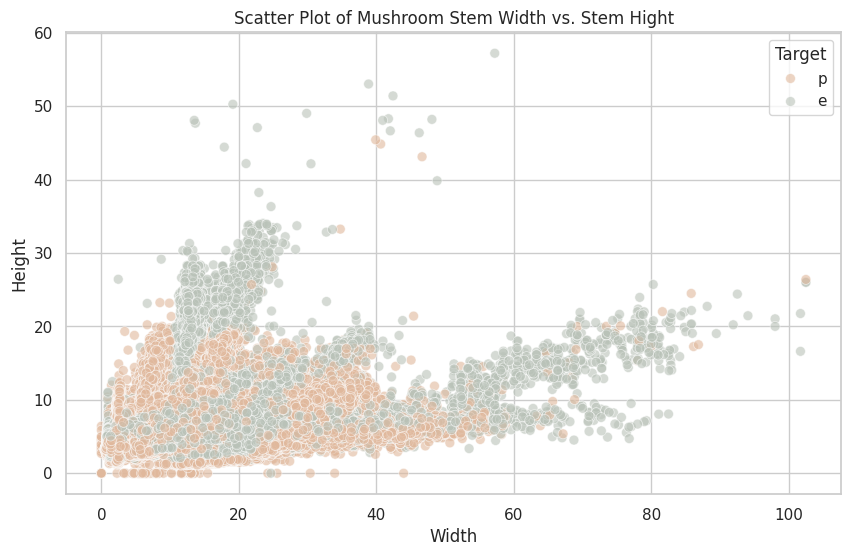

In [68]:
sampled_data = train.sample(frac=0.5)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="stem-width", y="stem-height", hue="class", data=sampled_data, alpha=0.6, s=50
)
plt.title("Scatter Plot of Mushroom Stem Width vs. Stem Hight")
plt.xlabel("Width")
plt.ylabel("Height")
plt.legend(title="Target")
plt.show()

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">10. stem-root</p>

In [69]:
train["stem-root"].describe()

count     359921
unique        38
top            b
freq      165801
Name: stem-root, dtype: object

In [70]:
train["stem-root"].value_counts()

stem-root
b                    165801
s                    116945
r                     47803
c                     28592
f                       597
d                        24
y                        14
g                        12
w                        12
p                        12
k                        11
l                        10
t                        10
n                        10
x                         9
i                         8
u                         8
a                         7
e                         6
o                         5
h                         4
m                         4
z                         2
5.59                      1
2.77                      1
20.01                     1
3.63                      1
10.87                     1
16.88                     1
15.69                     1
3.23                      1
1.48                      1
20.0                      1
18.06                     1
spore-print-color         1
3.49      

In [71]:
train.loc[:, "stem-root"] = train["stem-root"].apply(classify_cap_shape)
test.loc[:, "stem-root"] = test["stem-root"].apply(classify_cap_shape)

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">11. stem-surface</p>

In [72]:
train["stem-surface"].isna().mean()

0.6355134729852121

In [73]:
test["stem-surface"].isna().mean()

0.635953269642785

In [74]:
train["stem-surface"].unique()

array([nan, 'y', 's', 't', 'g', 'h', 'k', 'i', 'f', 'l', 'd', 'x',
       '12.04', 'w', 'a', 'o', 'c', 'n', 'm', 'e', 'p', 'z', '6.58',
       '4.34', 'b', '3.89', 'r', '25.83', '1.59', '0.0', '5.97', '5.81',
       'u', 'season', '10.48', '3.68', '5.56', '4.41', '5.48', '5.51',
       'class', 'has-ring', '13.1', '17.46', '5.35', '7.23', 'does None',
       '1.03', 'does s', '7.45', 'has h', 'does-bruise-or-bleed', '1.94',
       '49.46', '19.35', '2.68', '4.74', 'spore-print-color', '10.93',
       '24.12', '13.94'], dtype=object)

In [75]:
train.loc[:, "stem-surface"] = train["stem-surface"].apply(classify_cap_shape)
test.loc[:, "stem-surface"] = test["stem-surface"].apply(classify_cap_shape)

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">12. stem-color</p>

In [76]:
train["stem-color"].unique()

array(['w', 'o', 'n', 'y', 'e', 'u', 'p', 'f', 'g', 'r', 'k', 'l', 'b',
       '3.13', 't', 'z', 'a', 'h', 'd', nan, 's', '7.33', 'is n', 'i',
       'c', 'x', 'e n', '1.75', 'm', '33.52', 'ring-type', '2.78',
       'spore-print-color', '23.59', '8.32', 'is w', '26.4', '4.75',
       '7.84', 'class', '2.75', '8.49', '4.49', '1.41', '17.45', '3.53',
       '12.92', '3.98', '20.07', '7.7', '22.6', '6.31', '6.09', '3.56',
       '3.37', '4.62', '2.54', '39.51', '18.06', '4.33'], dtype=object)

In [77]:
train.loc[:, "stem-color"] = train["stem-color"].apply(classify_cap_shape)
test.loc[:, "stem-color"] = test["stem-color"].apply(classify_cap_shape)

In [78]:
train["stem-color"].value_counts()

stem-color
w          1196635
n          1003464
y           373971
g           132019
o           111541
e           103371
u            67017
p            54690
k            33676
r            22329
l             9994
b             7365
f              573
no_info         78
s               51
t               40
a               36
x               20
i               19
d               16
h               12
m               11
c                7
z                6
Name: count, dtype: int64

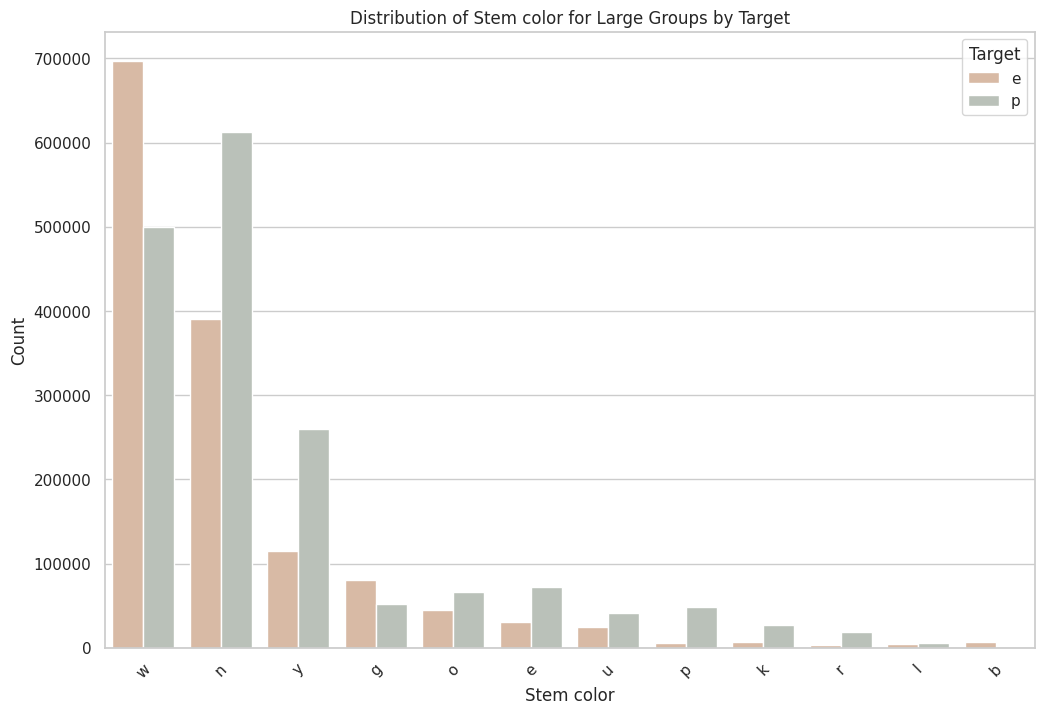

In [79]:
large_groups = train[
    train["stem-color"].isin(
        ["w", "n", "y", "g", "o", "e", "u", "p", "k", "r", "l", "b"]
    )
]

plt.figure(figsize=(12, 8))
sns.countplot(
    data=large_groups,
    x="stem-color",
    hue="class",
    order=large_groups["stem-color"].value_counts().index,
)
plt.title("Distribution of Stem color for Large Groups by Target")
plt.xlabel("Stem color")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Target")
plt.show()

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">13. veil-type</p>

In [80]:
train["veil-type"].describe()

count     159452
unique        22
top            u
freq      159373
Name: veil-type, dtype: object

In [81]:
train["veil-type"].value_counts()

veil-type
u          159373
w              11
a               9
e               8
f               8
c               5
b               5
y               4
k               4
g               4
n               3
s               3
d               2
h               2
i               2
p               2
r               2
21.11           1
t               1
is None         1
l               1
5.94            1
Name: count, dtype: int64

In [82]:
train["veil-type"].isna().sum()

2957489

In [83]:
# Обработка колонки veil-type в тренировочном наборе данных
train["veil-type"] = train["veil-type"].apply(
    lambda x: ("u" if pd.notna(x) else "no_info")
)

# Обработка колонки veil-type в тестовом наборе данных
test["veil-type"] = test["veil-type"].apply(
    lambda x: ("u" if pd.notna(x) else "no_info")
)

In [84]:
train["veil-type"].value_counts()

veil-type
no_info    2957489
u           159452
Name: count, dtype: int64

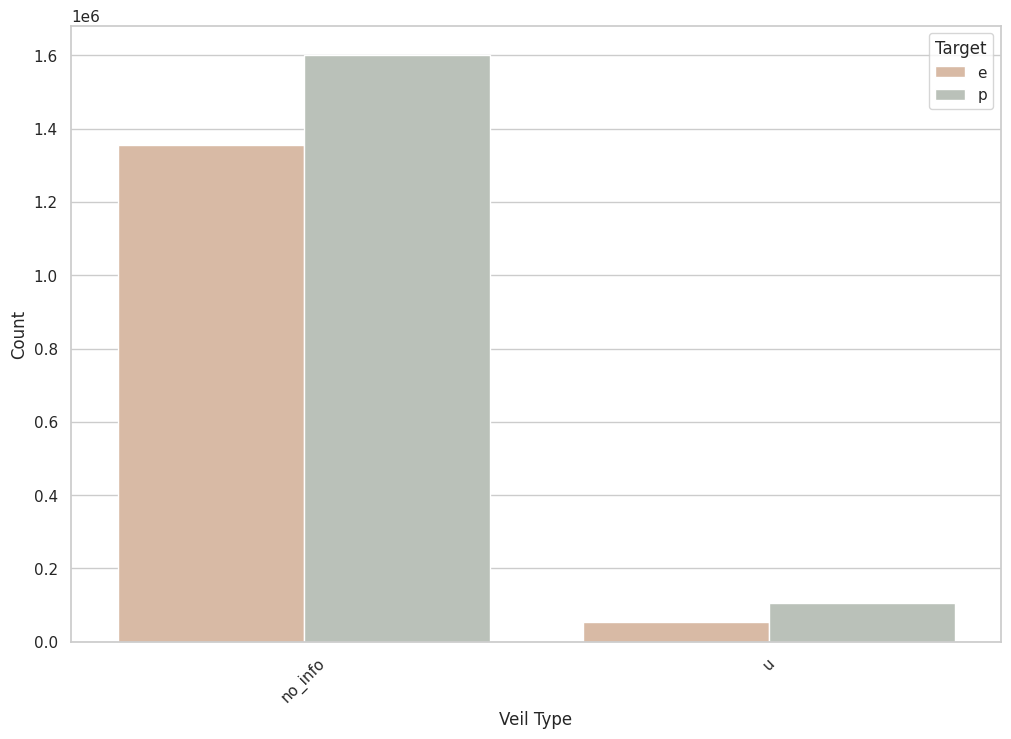

In [85]:
plt.figure(figsize=(12, 8))
sns.countplot(data=train, x="veil-type", hue="class")
plt.xlabel("Veil Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Target")
plt.show()

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">14. veil-color</p>

In [86]:
train["veil-color"].describe()

count     375997
unique        24
top            w
freq      279070
Name: veil-color, dtype: object

In [87]:
train["veil-color"].value_counts()

veil-color
w       279070
y        30473
n        30039
u        14025
k        13080
e         9169
g           30
p           23
r           14
o           13
s           11
t            7
a            7
d            6
i            6
h            5
f            4
c            4
l            4
b            3
8.25         1
2.49         1
z            1
3.32         1
Name: count, dtype: int64

In [88]:
train.loc[:, "veil-color"] = train["veil-color"].apply(classify_cap_shape)
test.loc[:, "veil-color"] = test["veil-color"].apply(classify_cap_shape)

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">15. has-ring</p>

In [89]:
train["has-ring"].value_counts()

has-ring
f             2368816
t              747982
r                  16
h                  13
c                  11
s                  11
l                  11
p                  11
g                   8
z                   6
e                   6
x                   5
m                   4
y                   3
d                   3
o                   2
k                   2
n                   2
f has-ring          1
i                   1
10.3                1
w                   1
a                   1
Name: count, dtype: int64

In [90]:
train["has-ring"].isna().sum()

24

In [91]:
has_ring_values = ["f", "t"]


train["has-ring"] = train["has-ring"].apply(
    lambda x: x if x in has_ring_values else "no_info"
)

test["has-ring"] = test["has-ring"].apply(
    lambda x: x if x in has_ring_values else "no_info"
)

In [92]:
train["has-ring"].value_counts()

has-ring
f          2368816
t           747982
no_info        143
Name: count, dtype: int64

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">16. ring-type</p>

In [93]:
train["ring-type"].describe()

count     2988061
unique         40
top             f
freq      2477166
Name: ring-type, dtype: object

In [94]:
train["ring-type"].unique()

array(['f', 'z', 'e', nan, 'p', 'l', 'g', 'r', 'm', 'y', 'h', 'o', 't',
       'ring-type', 'a', 'd', 's', 'x', '4', 'b', '15', 'u', 'n', 'w',
       'does f', '3.12', 'i', 'season', 'k', 'c', 'does-bruise-or-bleed',
       '11', '23.6', '1', '14', '2', 'spore-print-color', 'class', 'sp',
       '2.87', '8.25'], dtype=object)

In [95]:
train.loc[:, "ring-type"] = train["ring-type"].apply(classify_cap_shape)
test.loc[:, "ring-type"] = test["ring-type"].apply(classify_cap_shape)

In [96]:
train["ring-type"].value_counts()

ring-type
f          2477166
no_info     128907
e           120006
z           113780
l            73443
r            67909
p            67678
g            63687
m             3992
t               98
d               37
n               34
x               32
b               29
y               25
s               18
k               18
a               16
h               15
w               14
u               13
c               11
o                9
i                4
Name: count, dtype: int64

In [97]:
train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">17. spore-print-color</p>

In [98]:
train["spore-print-color"].isna().mean()

0.9142547131947637

I think it's better to drop this feature

In [99]:
columns_to_drop = ["spore-print-color"]

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">18. habitat</p>

In [100]:
train["habitat"].unique()

array(['d', 'l', 'g', 'h', 'p', 'm', 'u', 'w', 'y', nan, 'n', 'a', 's',
       'k', 'habitat', 'z', '8.09', '17.1', 'b', 't', 'c', '9.28',
       'ring-type', 'e', 'r', 'does-bruise-or-bleed', 'f', 'is w', 'o',
       '2.94', 'x', '4', 'is h', '5.56', 'class', 'i', '10.07', '7.31',
       '5.62', 'spore-print-color', 'cap-diameter', '3.11', '16.46',
       '7.37', 'veil-type', '17.38', '1.66', '6.63', '18.35', '6.75',
       '2.44', '3.68', '2.25'], dtype=object)

In [101]:
train.loc[:, "habitat"] = train["habitat"].apply(classify_cap_shape)
test.loc[:, "habitat"] = test["habitat"].apply(classify_cap_shape)

#### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">19. season</p>

In [102]:
train["season"].describe()

count     3116941
unique          4
top             a
freq      1543317
Name: season, dtype: object

In [103]:
train["season"].isna().sum()

0

In [104]:
test["season"].isna().sum()

0

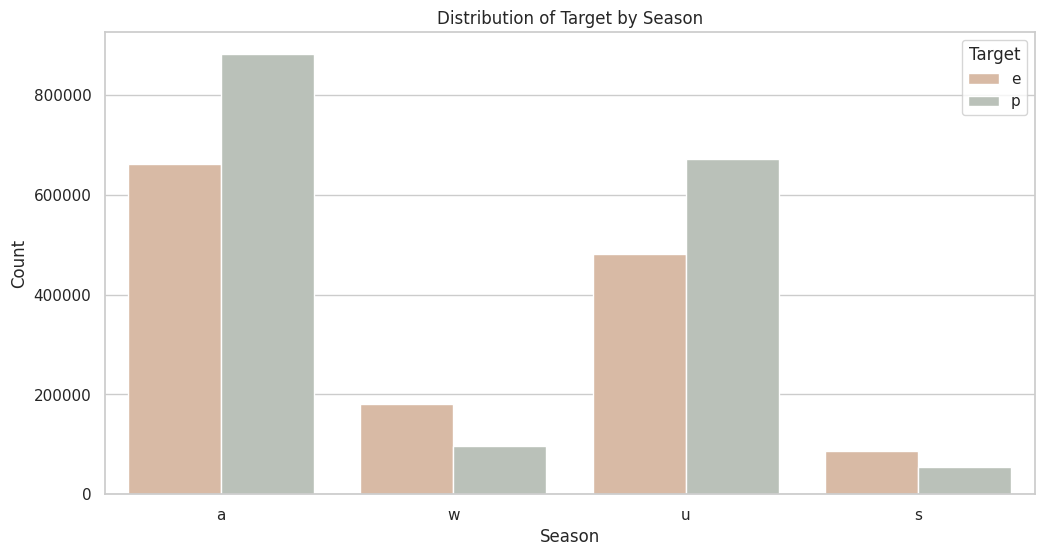

In [105]:
plt.figure(figsize=(12, 6))
sns.countplot(x="season", data=train, hue="class")
plt.title("Distribution of Target by Season")
plt.xlabel("Season")
plt.ylabel("Count")
plt.legend(title="Target")
plt.show()

### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">3. Preprocessing</p>

In [106]:
train.columns

Index(['id', 'class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [107]:
len(train)

3116941

In [108]:
columns_to_drop

['spore-print-color']

In [109]:
X = [
    "cap-diameter",
    "cap-shape",
    "cap-surface",
    "cap-color",
    "does-bruise-or-bleed",
    "gill-attachment",
    "gill-spacing",
    "gill-color",
    "stem-height",
    "stem-width",
    "stem-root",
    "stem-surface",
    "stem-color",
    "veil-type",
    "veil-color",
    "has-ring",
    "ring-type",
    "habitat",
    "season",
]

y = ["class"]

numerical = ["cap-diameter", "stem-height", "stem-width"]

categorical = [
    "cap-shape",
    "cap-surface",
    "cap-color",
    "does-bruise-or-bleed",
    "gill-attachment",
    "gill-spacing",
    "gill-color",
    "stem-root",
    "stem-surface",
    "stem-color",
    "veil-type",
    "veil-color",
    "has-ring",
    "ring-type",
    "habitat",
    "season",
]

In [110]:
train[X].isna().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [111]:
test[X].isna().sum()

cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
habitat                 0
season                  0
dtype: int64

In [112]:
train[X]

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,habitat,season
0,8.80,f,s,u,f,a,c,w,4.51,15.39,no_info,no_info,w,no_info,no_info,f,f,d,a
1,4.51,x,h,o,f,a,c,n,4.79,6.48,no_info,y,o,no_info,no_info,t,z,d,w
2,6.94,f,s,b,f,x,c,w,6.85,9.93,no_info,s,n,no_info,no_info,f,f,l,w
3,3.88,f,y,g,f,s,no_info,g,4.16,6.53,no_info,no_info,w,no_info,no_info,f,f,d,u
4,5.85,x,l,w,f,d,no_info,w,3.37,8.36,no_info,no_info,w,no_info,no_info,f,f,g,a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3116940,9.29,f,no_info,n,t,no_info,no_info,w,12.14,18.81,b,no_info,w,u,w,t,g,d,u
3116941,10.88,s,no_info,w,t,d,c,p,6.65,26.97,no_info,no_info,w,no_info,no_info,f,f,d,u
3116942,7.82,x,e,e,f,a,no_info,w,9.51,11.06,no_info,no_info,y,no_info,w,t,z,d,a
3116943,9.45,p,i,n,t,e,no_info,p,9.13,17.77,no_info,y,w,no_info,no_info,t,p,d,u


<Axes: >

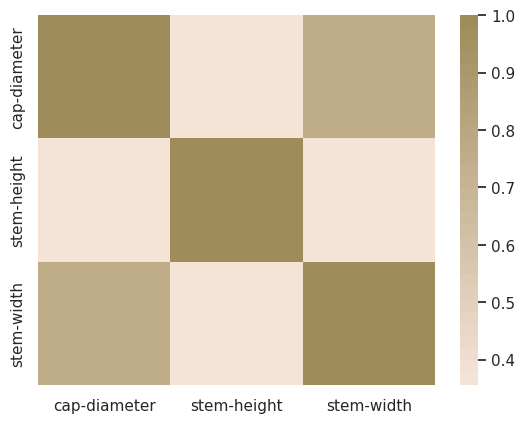

In [113]:
corr = train[numerical].corr()
sns.heatmap(corr, cmap=cmap)

In [114]:
columns_for_corr = X + y

In [115]:
for col in categorical:
    train[col] = train[col].astype("category")
    test[col] = test[col].astype("category")

In [116]:
import phik

phik_overview = train[columns_for_corr].phik_matrix()
phik_corr = phik_overview.round(2)

interval columns not set, guessing: ['cap-diameter', 'stem-height', 'stem-width']


In [117]:
phik_corr

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,habitat,season,class
cap-diameter,1.00,0.36,0.35,0.23,0.45,0.32,0.18,0.26,0.27,0.58,0.22,0.40,0.37,0.10,0.13,0.22,0.24,0.19,0.14,0.16
cap-shape,0.36,1.00,0.49,0.35,0.46,0.66,0.48,0.60,0.27,0.32,0.26,0.53,0.37,0.13,0.19,0.34,0.42,0.38,0.34,0.21
cap-surface,0.35,0.49,1.00,0.54,0.34,0.58,0.40,0.59,0.24,0.37,0.35,0.57,0.52,0.24,0.38,0.43,0.50,0.40,0.24,0.32
cap-color,0.23,0.35,0.54,1.00,0.25,0.47,0.31,0.67,0.22,0.22,0.23,0.40,0.74,0.19,0.25,0.25,0.38,0.40,0.24,0.33
does-bruise-or-bleed,0.45,0.46,0.34,0.25,1.00,0.55,0.25,0.34,0.13,0.35,0.22,0.37,0.28,0.02,0.22,0.10,0.31,0.23,0.12,0.02
gill-attachment,0.32,0.66,0.58,0.47,0.55,1.00,0.74,0.79,0.38,0.45,0.43,0.62,0.53,0.60,0.42,0.53,0.56,0.44,0.33,0.29
gill-spacing,0.18,0.48,0.40,0.31,0.25,0.74,1.00,0.71,0.18,0.16,0.18,0.47,0.28,0.14,0.23,0.25,0.27,0.25,0.23,0.12
gill-color,0.26,0.60,0.59,0.67,0.34,0.79,0.71,1.00,0.25,0.33,0.37,0.55,0.68,0.39,0.36,0.31,0.41,0.36,0.34,0.28
stem-height,0.27,0.27,0.24,0.22,0.13,0.38,0.18,0.25,1.00,0.27,0.38,0.21,0.23,0.51,0.30,0.29,0.56,0.31,0.11,0.10
stem-width,0.58,0.32,0.37,0.22,0.35,0.45,0.16,0.33,0.27,1.00,0.31,0.33,0.32,0.35,0.24,0.27,0.32,0.27,0.12,0.28


In [118]:
phik_corr["class"].sort_values(ascending=False)

class                   1.00
cap-color               0.33
stem-color              0.32
cap-surface             0.32
gill-attachment         0.29
stem-surface            0.29
stem-width              0.28
gill-color              0.28
ring-type               0.26
stem-root               0.23
habitat                 0.22
season                  0.22
veil-color              0.22
cap-shape               0.21
cap-diameter            0.16
gill-spacing            0.12
stem-height             0.10
veil-type               0.08
has-ring                0.03
does-bruise-or-bleed    0.02
Name: class, dtype: float64

<Axes: >

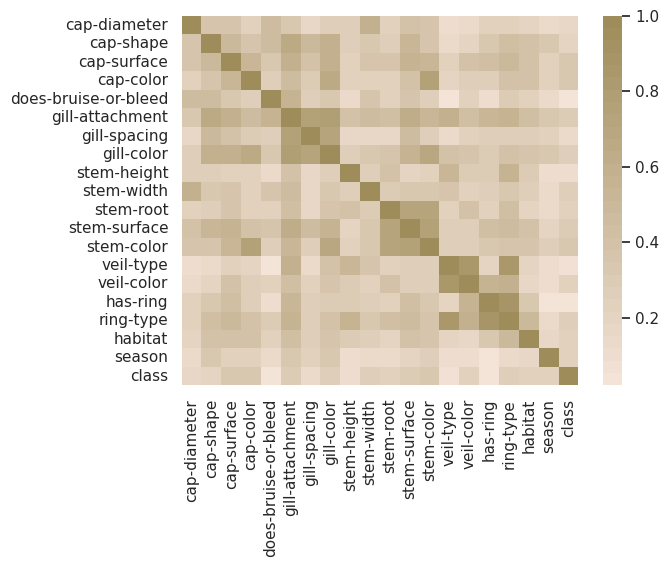

In [119]:
sns.heatmap(phik_overview.round(2), cmap=cmap)

array([[<Axes: title={'center': 'cap-diameter'}>,
        <Axes: title={'center': 'stem-height'}>],
       [<Axes: title={'center': 'stem-width'}>, <Axes: >]], dtype=object)

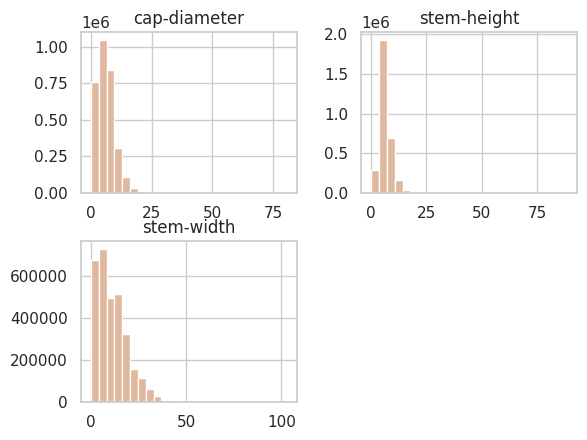

In [120]:
train[numerical].hist(bins=25)

In [121]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# train[numerical] = scaler.fit_transform(train[numerical])
# test[numerical] = scaler.transform(test[numerical])

### <p style="background-color:#d0a1a1;font-family:'Playfair Display', serif;color:#3f475e;font-size:120%;text-align:left;border-radius:3px 3px;">4. Modeling</p>

In [122]:
# 20 min

In [123]:
params = {
    "random_seed": 42,
    "verbose": 100,
    "loss_function": "Logloss",
    "early_stopping_rounds": 200,
    "eval_metric": "AUC",
}

train_first, val_first = train_test_split(train, train_size=0.75, random_state=42)

train_first_pool = Pool(
    data=train_first[X], label=train_first[y], cat_features=categorical
)

val_first_pool = Pool(val_first[X], label=val_first[y], cat_features=categorical)

model = CatBoostClassifier(**params)

model.fit(train_first_pool, eval_set=val_first_pool)

Learning rate set to 0.215278


0:	test: 0.8458811	best: 0.8458811 (0)	total: 720ms	remaining: 11m 59s


100:	test: 0.9965334	best: 0.9965334 (100)	total: 49.6s	remaining: 7m 21s


200:	test: 0.9966893	best: 0.9966893 (200)	total: 1m 36s	remaining: 6m 23s


300:	test: 0.9967819	best: 0.9967826 (294)	total: 2m 24s	remaining: 5m 34s


400:	test: 0.9968108	best: 0.9968108 (395)	total: 3m 7s	remaining: 4m 39s


500:	test: 0.9968247	best: 0.9968247 (500)	total: 3m 49s	remaining: 3m 48s


600:	test: 0.9968430	best: 0.9968430 (599)	total: 4m 34s	remaining: 3m 1s


700:	test: 0.9968444	best: 0.9968444 (692)	total: 5m 19s	remaining: 2m 16s


800:	test: 0.9968492	best: 0.9968493 (799)	total: 6m 4s	remaining: 1m 30s


900:	test: 0.9968606	best: 0.9968607 (896)	total: 6m 49s	remaining: 44.9s


999:	test: 0.9968706	best: 0.9968706 (992)	total: 7m 32s	remaining: 0us

bestTest = 0.996870609
bestIteration = 992

Shrink model to first 993 iterations.


In [124]:
best_params = model.get_all_params()

In [125]:
y_first_probe = model.predict_proba(val_first[X])

In [126]:
y_first_probe

array([[9.96888699e-01, 3.11130128e-03],
       [9.99236496e-01, 7.63503979e-04],
       [1.30244884e-03, 9.98697551e-01],
       ...,
       [1.58607246e-03, 9.98413928e-01],
       [2.47341062e-03, 9.97526589e-01],
       [9.97342328e-01, 2.65767217e-03]])

In [127]:
y_first_pred = model.predict(val_first[X])

In [128]:
val_first[y]

,class
808571,e
1911611,e
964256,p
1667412,p
2317857,p
...,...
2819388,p
3041228,e
2918931,p
2005689,p


In [129]:
y_first_probe[:, 1]

array([3.11130128e-03, 7.63503979e-04, 9.98697551e-01, ...,
       9.98413928e-01, 9.97526589e-01, 2.65767217e-03])

In [130]:
y_first_pred

array(['e', 'e', 'p', ..., 'p', 'p', 'e'], dtype=object)

In [131]:
y_first_probe[:, 1]

array([3.11130128e-03, 7.63503979e-04, 9.98697551e-01, ...,
       9.98413928e-01, 9.97526589e-01, 2.65767217e-03])

In [132]:
roc_auc = roc_auc_score(val_first[y], y_first_probe[:, 1])
print(f"ROC AUC: {roc_auc}")

average_precision = average_precision_score(
    val_first[y], y_first_probe[:, 1], pos_label="p"
)
print(f"Average Precision: {average_precision}")

f1 = f1_score(val_first[y], y_first_pred, pos_label="p")
print(f"F1-score: {f1}")

ROC AUC: 0.9968706089751315


Average Precision: 0.997136320998911


F1-score: 0.9925119288351733


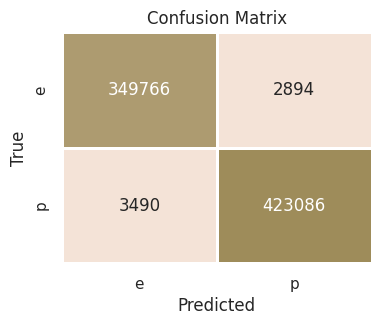

In [133]:
cm = confusion_matrix(val_first[y], model.predict(val_first[X]))

class_names = ["e", "p"]

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap=cmap,
    cbar=False,
    xticklabels=class_names,
    yticklabels=class_names,
    linewidths=1,
)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [134]:
val_first[y].value_counts()

class
p        426576
e        352660
Name: count, dtype: int64

In [135]:
print(classification_report(val_first[y], y_first_pred))

              precision    recall  f1-score   support

           e       0.99      0.99      0.99    352660
           p       0.99      0.99      0.99    426576

    accuracy                           0.99    779236
   macro avg       0.99      0.99      0.99    779236
weighted avg       0.99      0.99      0.99    779236



In [136]:
val_first["cat_boost_scores"] = y_first_probe[:, 1]
val_first["cat_boost_scores"].nunique()

567531

In [137]:
thrs = [i * 0.01 for i in range(101)]

In [138]:
thrs_near_0_5 = np.arange(0.48, 0.52, 0.001)

In [139]:
thrs_near_0_5

array([0.48 , 0.481, 0.482, 0.483, 0.484, 0.485, 0.486, 0.487, 0.488,
       0.489, 0.49 , 0.491, 0.492, 0.493, 0.494, 0.495, 0.496, 0.497,
       0.498, 0.499, 0.5  , 0.501, 0.502, 0.503, 0.504, 0.505, 0.506,
       0.507, 0.508, 0.509, 0.51 , 0.511, 0.512, 0.513, 0.514, 0.515,
       0.516, 0.517, 0.518, 0.519, 0.52 ])

In [140]:
val_first["cat_boost_scores"]

808571     0.003111
1911611    0.000764
964256     0.998698
1667412    0.999518
2317857    0.995122
             ...   
2819388    0.997378
3041228    0.002990
2918931    0.998414
2005689    0.997527
291208     0.002658
Name: cat_boost_scores, Length: 779236, dtype: float64

In [141]:
result = []
for thr in thrs_near_0_5:
    val_first["y_pred_new"] = val_first["cat_boost_scores"] > thr
    y_pred_labels = val_first["y_pred_new"].map({True: "p", False: "e"})
    result.append((thr, f1_score(val_first[y], y_pred_labels, pos_label="p")))

In [142]:
t = pd.DataFrame(result, columns=["thr", "f1"])
t = t.sort_values("f1", ascending=False)
t

,thr,f1
0,0.480,0.992531
2,0.482,0.992530
3,0.483,0.992530
4,0.484,0.992528
5,0.485,0.992528
14,0.494,0.992527
15,0.495,0.992527
10,0.490,0.992526
11,0.491,0.992526
12,0.492,0.992526


52	0.52	0.992423 prev best

In [143]:
t.iloc[0, :]["thr"]

0.48

In [144]:
custom_threshold = t.iloc[0, :]["thr"]
val_first["y_pred_best_thr"] = y_first_probe[:, 1] >= custom_threshold

In [145]:
val_first["y_pred_best_thr"]

808571     False
1911611    False
964256      True
1667412     True
2317857     True
           ...  
2819388     True
3041228    False
2918931     True
2005689     True
291208     False
Name: y_pred_best_thr, Length: 779236, dtype: bool

In [146]:
val_first["y_pred_best_thr"] = val_first["y_pred_best_thr"].map({True: "p", False: "e"})

In [147]:
val_first["y_pred_best_thr"]

808571     e
1911611    e
964256     p
1667412    p
2317857    p
          ..
2819388    p
3041228    e
2918931    p
2005689    p
291208     e
Name: y_pred_best_thr, Length: 779236, dtype: object

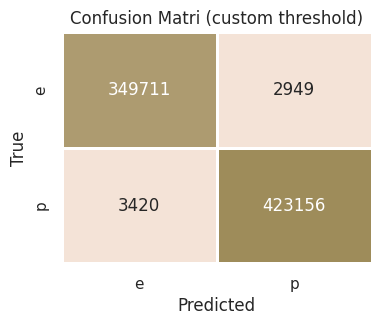

In [148]:
cm = confusion_matrix(val_first[y], val_first["y_pred_best_thr"])

class_names = ["e", "p"]

plt.figure(figsize=(4, 3))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap=cmap,
    cbar=False,
    xticklabels=class_names,
    yticklabels=class_names,
    linewidths=1,
)

plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matri (custom threshold)")
plt.show()

In [149]:
# TODO we can train our model on all train data (bit it gives worse f1 on test for some reason 0.98332 vs 0.98335)
# params = {
#     "random_seed": 42,
#     "verbose": 100,
#     "loss_function": "Logloss",
#     "early_stopping_rounds": 200,
#     "eval_metric": "AUC",
# }

# train_final_pool = Pool(data=train[X], label=train[y], cat_features=categorical)

# model = CatBoostClassifier(**params)

# model.fit(train_final_pool)

In [150]:
y_pred_proba = model.predict_proba(test[X])[:, 1]
test["class"] = y_pred_proba >= custom_threshold

In [151]:
test["class"] = test["class"].map({True: "p", False: "e"})

In [152]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(test[X])

In [153]:
feature_importances = model.get_feature_importance()

features = test[X].columns
feature_importance_df = pd.DataFrame(
    {"Feature": features, "Importance": feature_importances}
)

feature_importance_df = feature_importance_df.sort_values(
    by="Importance", ascending=False
)
feature_importance_df

,Feature,Importance
5,gill-attachment,16.130003
2,cap-surface,12.461225
12,stem-color,11.849435
9,stem-width,10.484541
11,stem-surface,8.350298
8,stem-height,5.637381
6,gill-spacing,5.623526
7,gill-color,4.908436
0,cap-diameter,4.374354
10,stem-root,3.880648


In [154]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0, :], test[X].iloc[0, :])

In [155]:
len(test)

2077964

In [156]:
test["class"]

0          e
1          p
2          p
3          p
4          e
          ..
2077959    p
2077960    p
2077961    p
2077962    e
2077963    e
Name: class, Length: 2077964, dtype: object

In [157]:
test

,id,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,class
0,3116945,8.64,x,no_info,n,t,no_info,no_info,w,11.13,...,no_info,w,u,w,t,g,NaN,d,a,e
1,3116946,6.90,o,t,o,f,no_info,c,y,1.27,...,no_info,n,no_info,no_info,f,f,NaN,d,a,p
2,3116947,2.00,b,g,n,f,no_info,c,n,6.18,...,no_info,n,no_info,no_info,f,f,NaN,d,s,p
3,3116948,3.47,x,t,n,f,s,c,n,4.98,...,no_info,w,no_info,n,t,z,NaN,d,u,p
4,3116949,6.17,x,h,y,f,p,no_info,y,6.73,...,no_info,y,no_info,y,t,no_info,NaN,d,u,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2077959,5194904,0.88,x,g,w,f,a,d,w,2.67,...,no_info,e,no_info,no_info,f,f,NaN,d,u,p
2077960,5194905,3.12,x,s,w,f,d,c,w,2.69,...,no_info,w,no_info,no_info,f,f,NaN,g,a,p
2077961,5194906,5.73,x,e,e,f,a,no_info,w,6.16,...,no_info,y,no_info,w,t,z,NaN,d,a,p
2077962,5194907,5.03,b,g,n,f,a,d,g,6.00,...,s,g,no_info,no_info,f,f,NaN,d,a,e


In [158]:
result = test[["id", "class"]]

# Сохранение в CSV файл
result.to_csv("/kaggle/working/submission.csv", index=False)

In [159]:
len(result)

2077964